# Assignment 1

* due Thursday, September 29, 10am, before the class; 
* 20 points;
* only electronic submissions (IPYNB file) will be accepted;
* no late submissions are allowed; 
* this is an individual assignment; 
* the submitted file should be named YourLastName_HW1.ipynb;
* do not forget to upload all the necessary libraries; 
* before the submission, clean the outputs and restart the notebook to make sure that everything runs as intended. 

# Problem Statement: 

For this assignment, you will work with several data sets from the [Gapminder](gapminder.org) resource.

Before you start analyzing the data, watch Hans Rosling’s talk about [“Why the world population won’t exceed 11 billion”](https://www.youtube.com/watch?v=2LyzBoHo5EI). Feel free to watch more of Hans Rosling’s talks about the world demographics and what aspects of life affect the number of children in each particular country and in the world.

You will use the data collected by Gapminder, an organization started by Hans Rosling, to provide the support for his ideas. 

Before you can get to the visualization, answer the first two of the following questions (based on the video): 

1. What is the world population number predicted in the talk and with what average number of children per woman this word population number will be achieved?

> a. (1 point) Download the Babies Per Woman CSV file from https://www.gapminder.org/data/;

> b. (1 point) In your notebook, create a `df` dataframe with the data from the CSV file.

> > i. If you opt to upload the assignment files locally, submit these files via blackboard together with your notebook;

> > ii. If you opt to store the assignment files online and upload them dynamically, make sure that these files are accessible by anyone who has the link.  

> c. (3 points) Use a line plot (`seaborn` or `matplotlib`) to show a trajectory (trajectories) that supports your answer to the question. 

2. How does the child mortality rate in the country affect the number of children per woman in this country?

> a. (1 point) Download the Child Mortality and the Income CSV files from 
https://www.gapminder.org/data/

> b. (1 point) In your notebook, create an `childmortality` and `income` dataframes with the data from the corresponding CSV files. 

> > i.	If you opt to upload the assignment files locally, submit these files via blackboard together with your notebook;

> > ii. If you opt to store the assignment files online and upload them dynamically, make sure that these files are accessible by anyone who has the link.  

3. (3 points) For each of the three created dataframes, keep only the data that corresponds to **2020**, and merge these three dataframes into one data dataframe that corresponds to the year 2020 and has four attributes: `Country`, `ChildPerWoman`, `ChildMortality`, `Income`. Merging dataframes corresponds to joining tables in SQL (https://pandas.pydata.org/docs/dev/user_guide/merging.html).

> a.	(2 points) Pay attention to the `Income` attribute, make sure that it can be used as an number (Hint: initially it cannot be used as a string because it contains the letter *k* for 1000).

> b.	Name the resulting dataframe `result`.

4. (1 point) Use the geography information from the Gapminder (https://docs.google.com/spreadsheets/d/1qHalit8sXC0R8oVXibc2wa2gY7bkwGzOybEMTWp-08o/edit#gid=501532268). I stored the information from the list-of-countries-etc tab here: https://github.com/ef2020/TextFiles/blob/master/gap_minder_geography.csv (do not forget to switch to the raw version of the file).

> a.	Store the geography information in `geo` data frame

5. (2 points) Update the `result` dataframe by merging it with the `geo` dataframe. 

6. (4 points) Create a bubble chart that will demonstrate the connection the income and number of children (x and y axis); the size of the bubble corresponds to the child mortality rate; the color of the bubble corresponds to the value of the four-regions attribute from the geo dataframe. 

7. (1 point) What conclusions can you make?


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [75]:
#1 Creating dataframe for children born 
df= pd.read_csv("https://raw.githubusercontent.com/fawad-chaudry/CST-3602-1/main/children_per_woman_total_fertility.csv")
df



,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,2.10,2.09,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02
198,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,1.68,1.68,1.69,1.69,1.69,1.69,1.70,1.70,1.70,1.70
199,South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
200,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,2.59,2.57,2.56,2.54,2.53,2.51,2.50,2.48,2.46,2.46


In [76]:
#2 Creating income dataframe and changing data type where numbers were objects
income = pd.read_csv("https://raw.githubusercontent.com/fawad-chaudry/CST-3602-1/main/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
years = incom.columns.drop('country')
income[years] = income[years].apply(pd.to_numeric, errors='coerce')
income


,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690.0,2750.0,2810.0,2870.0,2930.0,2990.0,3060.0,3120.0,3190.0,3260.0
1,Angola,700,702,705,709,711,714,718,721,725,...,8000.0,8170.0,8350.0,8530.0,8710.0,8900.0,9090.0,9280.0,9480.0,9690.0
2,Albania,755,755,755,755,755,756,756,756,756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,1590,1590,1590,1590,1590,1590,1590,1590,1590,...,8860.0,9050.0,9250.0,9440.0,9650.0,9860.0,NaN,NaN,NaN,NaN
191,Yemen,993,995,998,1000,1000,1010,1010,1010,1020,...,3750.0,3830.0,3910.0,3990.0,4080.0,4170.0,4260.0,4350.0,4440.0,4540.0
192,South Africa,1780,1760,1740,1720,1700,1610,1610,1750,1530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Zambia,751,753,755,756,758,760,762,764,765,...,4690.0,4790.0,4890.0,5000.0,5110.0,5220.0,5330.0,5440.0,5560.0,5680.0


In [77]:
#2 Creating child_mortality dataframe

child_mortality = pd.read_csv ("https://raw.githubusercontent.com/fawad-chaudry/CST-3602-1/main/child_mortality_0_5_year_olds_dying_per_1000_born.csv")
child_mortality

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,471.0,468.0,465.0,461.0,458.0,455.0,452.0,449.0,446.0,...,3.73,3.70,3.67,3.65,3.62,3.59,3.56,3.54,3.51,3.51
193,Yemen,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,...,14.30,14.10,13.80,13.60,13.40,13.20,13.00,12.80,12.60,12.60
194,South Africa,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,...,10.50,10.40,10.20,10.10,9.95,9.82,9.68,9.55,9.42,9.42
195,Zambia,410.0,410.0,410.0,410.0,410.0,410.0,410.0,410.0,410.0,...,12.50,12.30,12.20,12.10,11.90,11.80,11.70,11.60,11.40,11.40


In [78]:
#3 Creating a table for income in 2020 per country

income2020 = income[['country', '2020']]
income2020



,country,2020
0,Afghanistan,1950.0
1,Angola,5980.0
2,Albania,NaN
3,Andorra,NaN
4,United Arab Emirates,NaN
...,...,...
190,Samoa,5860.0
191,Yemen,2260.0
192,South Africa,NaN
193,Zambia,3310.0


In [79]:
#3 Creating a table for income in 2020 per country

ChildMortality2020 = child_mortality[['country', '2020']]
ChildMortality2020

,country,2020
0,Afghanistan,56.10
1,Angola,70.40
2,Albania,8.36
3,Andorra,2.82
4,United Arab Emirates,6.97
...,...,...
192,Samoa,14.50
193,Yemen,54.10
194,South Africa,31.30
195,Zambia,53.00


In [80]:
#3 Creating a table for ChildBirth in 2020 per country

ChildBirth2020 = df[['country', '2020']]
ChildBirth2020

,country,2020
0,Aruba,1.79
1,Afghanistan,3.90
2,Angola,5.34
3,Albania,1.70
4,Netherlands Antilles,1.82
...,...,...
197,Samoa,3.74
198,Yemen,3.52
199,South Africa,2.33
200,Zambia,4.71


In [81]:
#3 Merging 2 tables ChildBirth2020 and ChildMortality2020

result1 = ChildBirth2020.merge(ChildMortality2020, on=['country'])
result1

,country,2020_x,2020_y
0,Afghanistan,3.90,56.10
1,Angola,5.34,70.40
2,Albania,1.70,8.36
3,United Arab Emirates,1.67,6.97
4,Argentina,2.22,9.16
...,...,...,...
181,Samoa,3.74,14.50
182,Yemen,3.52,54.10
183,South Africa,2.33,31.30
184,Zambia,4.71,53.00


In [82]:
#3 Merging ChildBirth, ChildMortality,Income in 2020 per Country
result2 = result1.merge(income2020, on=['country'])
result2.rename(columns = {'2020_x':'Birth_Rate_2020', '2020_y': 'Child_Mortality_2020', '2020':'Income_2020'}, inplace= True)
result= result2.sort_values(by = ['country'])
result

,country,Birth_Rate_2020,Child_Mortality_2020,Income_2020
0,Afghanistan,3.90,56.10,1950.0
2,Albania,1.70,8.36,NaN
47,Algeria,2.49,21.60,NaN
1,Angola,5.34,70.40,5980.0
6,Antigua and Barbuda,2.00,5.95,NaN
...,...,...,...,...
178,Venezuela,2.21,25.30,5340.0
179,Vietnam,1.94,19.70,8330.0
182,Yemen,3.52,54.10,2260.0
184,Zambia,4.71,53.00,3310.0


In [83]:
#4 Creating geo dataframe

geo1 = pd.read_csv("https://raw.githubusercontent.com/ef2020/TextFiles/master/gap_minder_geography.csv")
geo= geo1.sort_values(by = 'name')
geo.rename(columns = {'name': 'country'}, inplace= True)
geo

,geo,country,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017",UNHCR
140,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,19/11/1946,South Asia,Low income,Low income,Asia and the Pacific
32,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14/12/1955,Europe & Central Asia,Upper middle income,Middle income,Europe
117,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8/10/1962,Middle East & North Africa,Upper middle income,Middle income,Middle East and North Africa
33,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28/7/1993,Europe & Central Asia,High income,High income,Europe
148,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1/12/1976,Sub-Saharan Africa,Lower middle income,Middle income,Southern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,ven,Venezuela,americas,america_south,america,g77,8.00000,-66.00000,15/11/1945,Latin America & Caribbean,Upper middle income,Middle income,Americas
31,vnm,Vietnam,asia,east_asia_pacific,east_asia_pacific,g77,16.16667,107.83333,20/9/1977,East Asia & Pacific,Lower middle income,Middle income,Asia and the Pacific
137,yem,Yemen,asia,asia_west,middle_east_north_africa,g77,15.50000,47.50000,30/9/1947,Middle East & North Africa,Lower middle income,Middle income,Middle East and North Africa
193,zmb,Zambia,africa,africa_sub_saharan,sub_saharan_africa,g77,-14.33333,28.50000,1/12/1964,Sub-Saharan Africa,Lower middle income,Middle income,Southern Africa


In [86]:
#5 Merging result and geo dataframes

result = result.merge(geo, on=['country'])
result



,country,Birth_Rate_2020,Child_Mortality_2020,Income_2020,geo_x,four_regions_x,eight_regions_x,six_regions_x,members_oecd_g77_x,Latitude_x,...,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017",UNHCR
0,Afghanistan,3.90,56.10,1950.0,afg,asia,asia_west,south_asia,g77,33.00000,...,asia_west,south_asia,g77,33.00000,66.00000,19/11/1946,South Asia,Low income,Low income,Asia and the Pacific
1,Albania,1.70,8.36,NaN,alb,europe,europe_east,europe_central_asia,others,41.00000,...,europe_east,europe_central_asia,others,41.00000,20.00000,14/12/1955,Europe & Central Asia,Upper middle income,Middle income,Europe
2,Algeria,2.49,21.60,NaN,dza,africa,africa_north,middle_east_north_africa,g77,28.00000,...,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8/10/1962,Middle East & North Africa,Upper middle income,Middle income,Middle East and North Africa
3,Angola,5.34,70.40,5980.0,ago,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,...,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1/12/1976,Sub-Saharan Africa,Lower middle income,Middle income,Southern Africa
4,Antigua and Barbuda,2.00,5.95,NaN,atg,americas,america_north,america,g77,17.05000,...,america_north,america,g77,17.05000,-61.80000,11/11/1981,Latin America & Caribbean,High income,High income,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,2.21,25.30,5340.0,ven,americas,america_south,america,g77,8.00000,...,america_south,america,g77,8.00000,-66.00000,15/11/1945,Latin America & Caribbean,Upper middle income,Middle income,Americas
180,Vietnam,1.94,19.70,8330.0,vnm,asia,east_asia_pacific,east_asia_pacific,g77,16.16667,...,east_asia_pacific,east_asia_pacific,g77,16.16667,107.83333,20/9/1977,East Asia & Pacific,Lower middle income,Middle income,Asia and the Pacific
181,Yemen,3.52,54.10,2260.0,yem,asia,asia_west,middle_east_north_africa,g77,15.50000,...,asia_west,middle_east_north_africa,g77,15.50000,47.50000,30/9/1947,Middle East & North Africa,Lower middle income,Middle income,Middle East and North Africa
182,Zambia,4.71,53.00,3310.0,zmb,africa,africa_sub_saharan,sub_saharan_africa,g77,-14.33333,...,africa_sub_saharan,sub_saharan_africa,g77,-14.33333,28.50000,1/12/1964,Sub-Saharan Africa,Lower middle income,Middle income,Southern Africa


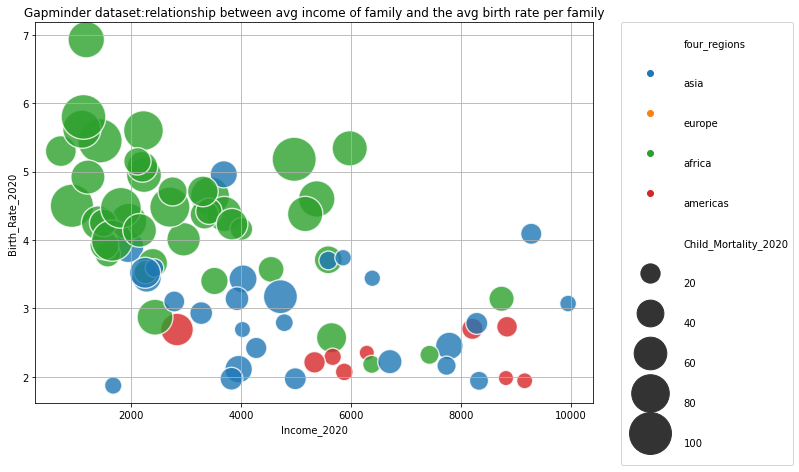

In [87]:
#6 Bubble chart
plt.rcParams['figure.figsize']=(10,7)
sns.scatterplot(data=result, x="Income_2020", y="Birth_Rate_2020",size="Child_Mortality_2020",sizes=(50,2000),hue="four_regions",alpha=0.8).set(title='Gapminder dataset:relationship between avg income of family and the avg birth rate per family')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, handlelength=5, handleheight=5, fontsize = 10);
# show the graph
plt.grid()
plt.show()

